<a href="https://colab.research.google.com/github/bradleywhitlock/CDP-Exploration/blob/master/Introduction_to_Data_Visualization_CDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Data Visualization @ Cognite

## Getting Started
* Generate an API Key to access [Open Industrial Data](https://openindustrialdata.com/). Get your key via the Google Access platform. You will be asked to fill out some personal information to generate your personal key.
* Access Cognite's [Operational Intelligence](https://opint.cogniteapp.com/publicdata/infographics/-LOHKEJPLvt0eRIZu8mE) dashboard. This page shows live readings streaming from the Valhall oil field located in the North Sea.
* Follow along in the notebook to get an idea of how to interact with the Python SDK ([Docs](https://cognite-sdk-python.readthedocs-hosted.com/en/latest/)).

## Environment Setup

#### Install the Cognite SDK package

In [2]:
!pip install cognite-sdk

    100% |████████████████████████████████| 61kB 2.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/e5/92/dd/a6992dd3087f76743c449a872bebfebca6b9c414dfef39f6ac
Successfully built cognite-logger


#### Import the required packages

In [0]:
%matplotlib inline

import os
from datetime import datetime, timedelta
from datetime import datetime
from getpass import getpass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from cognite import CogniteClient

#### Connect to the Cognite Data Platform

In [4]:
client = CogniteClient(api_key=getpass("Open Industrial API-KEY: "))

Open Industrial API-KEY: ··········


## Accessing Cognite Data Platform (CDP)

### Collecting Asset Information

#### Get asset information for chosen Asset
* The asset name was retrieved from [Op Int](https://opint.cogniteapp.com/publicdata/infographics/-LOHKEJPLvt0eRIZu8mE)
* It is important to refer back to the [SDK](https://cognite-sdk-python.readthedocs-hosted.com/en/latest/cognite.html) for specific details on arguments.

In [5]:
asset_name = "23-HA-9103"
asset_df = client.assets.search_for_assets(name=asset_name).to_pandas()
asset_df.head()


,createdTime,depth,description,id,lastUpdatedTime,metadata,name,parentId,path
0,0,6,VRD - 1ST STAGE SUCTION COOLER,2861239574637735,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531306', ...",23-HA-9103,2513266419866445,"[6687602007296940, 4650652196144007, 311145472..."
1,0,6,VRD - 1ST STAGE DISCHARGE COOLER 2,1305599545806638,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531303', ...",23-HA-9115,2513266419866445,"[6687602007296940, 4650652196144007, 311145472..."
2,0,8,VRD - 1ST STAGE COMPRESSOR LUBE OIL COOLER A,4965752723543746,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '786890', ...",23-HA-9107A,2137557577165478,"[6687602007296940, 4650652196144007, 311145472..."
3,0,6,VRD - 1ST STAGE DISCHARGE COOLER 1,5345363121325760,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531303', ...",23-HA-9114,2513266419866445,"[6687602007296940, 4650652196144007, 311145472..."
4,0,8,VRD - 1ST STAGE COMPRESSOR LUBE OIL COOLER B,6838563873305104,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '786896', ...",23-HA-9107B,2137557577165478,"[6687602007296940, 4650652196144007, 311145472..."


#### Filter the assets to get asset-specific details

In [7]:
asset_id = asset_df[asset_df["name"] == asset_name].iloc[0]['id']
asset = client.assets.get_asset(asset_id=asset_id).to_pandas()
asset

,0
id,2861239574637735
depth,6
name,23-HA-9103
parentId,2513266419866445
description,VRD - 1ST STAGE SUCTION COOLER
metadata,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531306', ..."
createdTime,0
lastUpdatedTime,0
path,"[6687602007296940, 4650652196144007, 311145472..."


#### Investigate the child assets
* Depth
  * The number of edges between the parent node and the specific node
* Description
  * Includes information such as the platform and type of sensor being monitored
  
In this case, a list of all children of the main asset will be generated

In [8]:
subtree_df = client.assets.get_asset_subtree(asset_id=asset_id, depth=1).to_pandas()
subtree_df.head()

,createdTime,depth,description,id,lastUpdatedTime,metadata,name,parentId,path
0,0,6,VRD - 1ST STAGE SUCTION COOLER,2861239574637735,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '531306', ...",23-HA-9103,2513266419866445,"[6687602007296940, 4650652196144007, 311145472..."
1,0,7,VRD - PH 1STSTGSUCTCOOL SHELL PSV IN,274450897701725,0,"{'ELC_STATUS_ID': '1225', 'RES_ID': '444134', ...",45-HV-92510-01,2861239574637735,"[6687602007296940, 4650652196144007, 311145472..."
2,0,7,VRD - PH 1STSTGSUCTCLR GAS IN,576308321452985,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '609895', ...",23-ESDV-92501A,2861239574637735,"[6687602007296940, 4650652196144007, 311145472..."
3,0,7,VRD - PH 1STSTGSUCTCOOL SHELL PSV OUT,619750565594754,0,"{'ELC_STATUS_ID': '1225', 'RES_ID': '510103', ...",45-HV-92510-03,2861239574637735,"[6687602007296940, 4650652196144007, 311145472..."
4,0,7,VRD - PH 1STSTGSUCTCOOL COOLMED OUT,705952550422793,0,"{'ELC_STATUS_ID': '1211', 'RES_ID': '485917', ...",45-PT-92508,2861239574637735,"[6687602007296940, 4650652196144007, 311145472..."


### Collecting Time Series Information and Data Points

#### Compile a list of time series objects under the asset
* For each of the children assets, get the associated time series objects and merge them into a DataFrame

In [9]:
all_ts_df = pd.DataFrame()

for index, asset in subtree_df.iterrows():
  ts_df = client.time_series.get_time_series(asset_id=int(asset['id'])).to_pandas()
  
  if not ts_df.empty:
    all_ts_df = all_ts_df.append(ts_df, ignore_index=True)
    
all_ts_df

,assetId,createdTime,description,id,isStep,isString,lastUpdatedTime,name
0,705952550422793,0,PH 1stStgSuctCool CoolMed Out,3529821833330815,False,False,0,VAL_45-PT-92508:X.Value
1,786220428505816,0,PH 1stStgSuctCool Gas In,3518012501014915,False,False,0,VAL_23-FT-92512:X.Value
2,2814662602621825,0,PH 1stStgSuctCool Gas In,6156871056679530,False,False,0,VAL_23-PT-92512:X.Value
3,4840206559741735,0,PH 1stStgSuctCool Gas In,5474031062875475,False,False,0,VAL_23-TT-92502:X.Value
4,5193727763959013,0,PH 1stStgSuctCool Gas Out,7491681405625794,False,False,0,VAL_23-PT-92504:X.Value
5,5439867226448359,0,PH 1stStgSuctCool Gas In,988967451935968,False,False,0,VAL_23-TT-92512:X.Value
6,5497674254221099,0,PH 1stStgSuctCool CoolMed In,1920137775628302,False,False,0,VAL_45-FT-92506:X.Value
7,5552927149248373,0,PH 1stStgSuctCool Gas In ESDV,5880632484472759,False,False,0,VAL_23-PDT-92501:X.Value
8,5891006566061532,0,PH 1stStgSuctClr CoolMed Out,3929156348065703,False,False,0,VAL_45-TT-92508:X.Value
9,6681756879590530,0,PH 1stStgSuctCool Tubes,7891376783606949,False,False,0,VAL_23-PDT-92502:X.Value


#### View datapoints for one of the time series

In [18]:
client.datapoints.get_datapoints("VAL_45-PT-92508:X.Value", start="10d-ago").to_pandas().head()

,timestamp,value
0,1548685808404,2.194034
1,1548685810404,2.195071
2,1548685811404,2.192996
3,1548685812404,2.194034
4,1548685813404,2.199222


#### Collect datapoints from CDP
* The following 4 columns were chosen in an effort to estimate the output pressure of the suction cooler
* The input variables 

In [0]:
in_ts_names = ["VAL_23-FT-92512:X.Value", "VAL_23-PT-92512:X.Value", "VAL_23-TT-92502:X.Value"]
out_ts_name = "VAL_23-PT-92504:X.Value"
ts_names = in_ts_names + [out_ts_name]
print (ts_names)

['VAL_23-FT-92512:X.Value', 'VAL_23-PT-92512:X.Value', 'VAL_23-TT-92502:X.Value', 'VAL_23-PT-92504:X.Value']


In [0]:
train_start_date = datetime(2018, 8, 1)
train_end_date = start_date + timedelta(days=30)

datapoints_df = client.datapoints.get_datapoints_frame(time_series=ts_names,
                                                       aggregates=['avg'],
                                                       granularity='1m',
                                                       start=train_start_date,
                                                       end=train_end_date
                                                       )
# Remove the "|average" appended to the end of the column names
datapoints_df.columns = ["timestamp"] + ts_names
datapoints_df.head()

,timestamp,VAL_23-FT-92512:X.Value,VAL_23-PT-92512:X.Value,VAL_23-TT-92502:X.Value,VAL_23-PT-92504:X.Value
0,1533081600000,91120.918480,3.374376,44.184863,3.251437
1,1533081660000,86259.975220,3.395966,44.232420,3.274299
2,1533081720000,90750.665657,3.410101,44.161438,3.287578
3,1533081780000,91948.525170,3.358822,43.986025,3.237081
4,1533081840000,93779.111997,3.429458,43.797913,3.306391


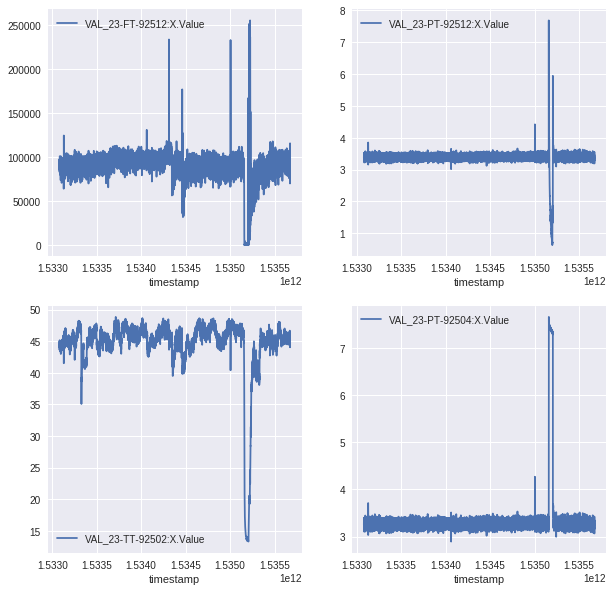

In [0]:
cols = list(datapoints_df.columns)
cols.remove('timestamp')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for i, col in enumerate(cols):
  datapoints_df.plot(x='timestamp', y=col, ax=axes[int(i>1), i%2]);



## Gather the training data

In [0]:
train_X = datapoints_df[in_ts_names].values
train_y = datapoints_df[out_ts_name].values

## Get Data from CDP to make predictions on

In [0]:
predict_start_date = train_end_date
predict_end_date = train_end_date + timedelta(hours=1)

predict_df = client.datapoints.get_datapoints_frame(time_series=ts_names,
                                                       aggregates=['avg'],
                                                       granularity='1m',
                                                       start=predict_start_date,
                                                       end=predict_end_date
                                                       )
predict_df.columns = ["timestamp"] + ts_names
predict_df = predict_df.fillna(method='ffill')
predict_df.head()

,timestamp,VAL_23-FT-92512:X.Value,VAL_23-PT-92512:X.Value,VAL_23-TT-92502:X.Value,VAL_23-PT-92504:X.Value
0,1535673600000,96596.397652,3.390761,44.822433,3.266866
1,1535673660000,92941.748459,3.382212,44.879119,3.259393
2,1535673720000,100634.003031,3.477319,45.053927,3.348573
3,1535673780000,103948.895082,3.434556,45.404786,3.305596
4,1535673840000,101079.342794,3.348590,45.698323,3.222974


## Test Linear Regression model

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


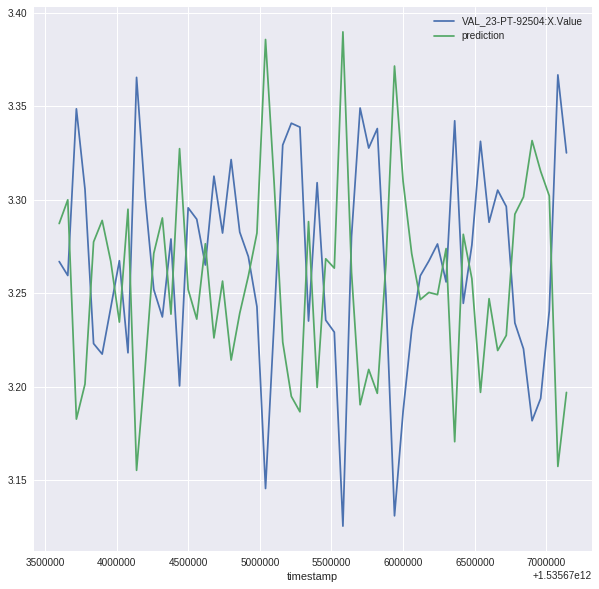

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)

X = predict_df[in_ts_names].values
predict_df["prediction"] = lin_reg.predict(X)

predict_df.plot(x="timestamp", y=[out_ts_name, "prediction"], figsize=(10,10));


## Test Random Forest Regressor

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


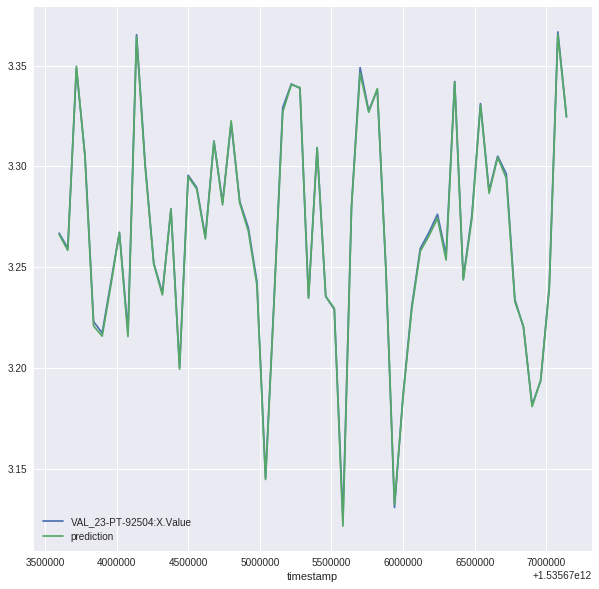

In [0]:
rnd_forest_reg = RandomForestRegressor(n_estimators=10, min_samples_split=100)
rnd_forest_reg.fit(train_X, train_y)

X = predict_df[in_ts_names].values
predict_df["prediction"] = rnd_forest_reg.predict(X)

predict_df.plot(x="timestamp", y=[out_ts_name, "prediction"], figsize=(10,10));


